In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = None

In [2]:
df = pd.read_csv("churn_data.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3806,0650-BWOZN,Female,1,No,No,18,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,73.55,1359.45,No
2584,3969-JQABI,Female,0,Yes,No,58,Yes,No,DSL,Yes,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),65.25,3791.6,No
2265,1583-IHQZE,Male,0,No,No,12,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,112.95,1384.75,Yes
2048,9961-JBNMK,Male,1,No,No,21,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),96.80,2030.3,Yes
2018,7065-YUNRY,Female,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.30,45.3,Yes


In [3]:
df.drop('customerID', axis = 'columns', inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [5]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [6]:
pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [7]:
df[pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
df[pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()].shape

(11, 20)

In [9]:
df.shape

(7043, 20)

In [10]:
df.iloc[488]['TotalCharges']

' '

In [11]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [12]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [13]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

/var/folders/4f/9wwls0j92z90fgmqsv9knhsc0000gn/T/ipykernel_22977/973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [14]:
df1.TotalCharges.dtypes

dtype('float64')

Loyal Customers

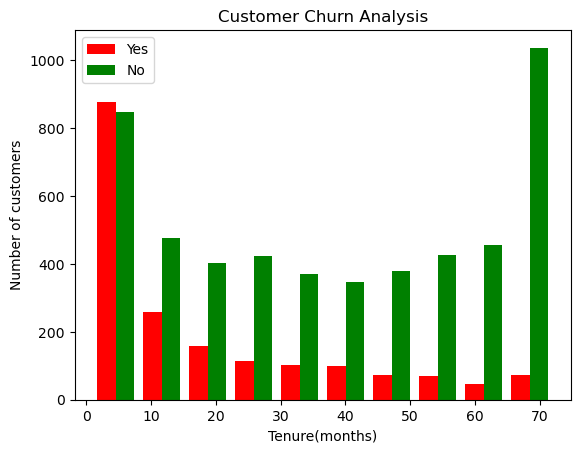

In [15]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure
plt.xlabel('Tenure(months)')
plt.ylabel('Number of customers')
plt.title('Customer Churn Analysis')
plt.hist([tenure_churn_yes, tenure_churn_no], color = ['red', 'green'], label = ['Yes', 'No'])
plt.legend()

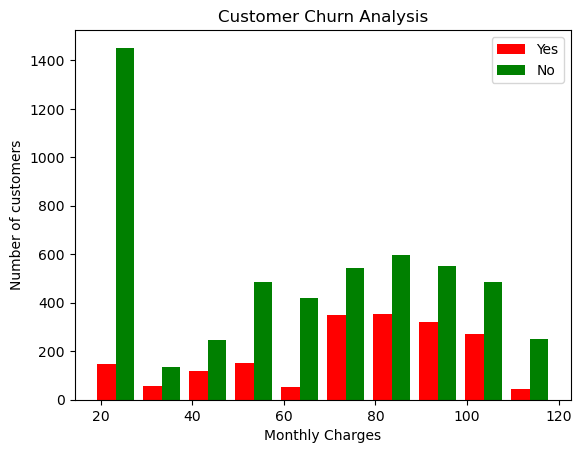

In [16]:
tenure_churn_no = df1[df1.Churn=='No'].MonthlyCharges
tenure_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges
plt.xlabel('Monthly Charges')
plt.ylabel('Number of customers')
plt.title('Customer Churn Analysis')
plt.hist([tenure_churn_yes, tenure_churn_no], color = ['red', 'green'], label = ['Yes', 'No'])
plt.legend()

In [17]:
def print_unique_col_values(df):
    for column in df:
        if df1[column].dtypes == 'object':
            print(f'{column} : {df[column].unique()}')

In [18]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [19]:
df1.replace('No internet service', 'No', inplace=True)
df1.replace('No phone service', 'No', inplace=True)

/var/folders/4f/9wwls0j92z90fgmqsv9knhsc0000gn/T/ipykernel_22977/4245438437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service', 'No', inplace=True)
/var/folders/4f/9wwls0j92z90fgmqsv9knhsc0000gn/T/ipykernel_22977/4245438437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service', 'No', inplace=True)


In [20]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [21]:
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for col in yes_no_columns:
    df1[col].replace({'Yes' : 1, 'No' : 0}, inplace=True)

/var/folders/4f/9wwls0j92z90fgmqsv9knhsc0000gn/T/ipykernel_22977/4065720361.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes' : 1, 'No' : 0}, inplace=True)


In [22]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [23]:
df1[yes_no_columns]

,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn
0,1,0,0,0,0,1,0,0,0,0,1,0
1,0,0,1,0,1,0,1,0,0,0,0,0
2,0,0,1,0,1,1,0,0,0,0,1,1
3,0,0,0,0,1,0,1,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,1,0,1,1,1,1,1,0
7039,1,1,1,1,0,1,1,0,1,1,1,0
7040,1,1,0,0,1,0,0,0,0,0,1,0
7041,1,0,1,1,0,0,0,0,0,0,1,1


In [24]:
male_female = ['gender']

for col in male_female:
    df1[col].replace({'Male' : 1, 'Female' : 0}, inplace=True)

/var/folders/4f/9wwls0j92z90fgmqsv9knhsc0000gn/T/ipykernel_22977/3007113260.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Male' : 1, 'Female' : 0}, inplace=True)


In [25]:
print_unique_col_values(df1)

InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [26]:
df2 = pd.get_dummies(data=df1, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)

In [27]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [28]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6681,1,1,0,0,3,1,1,0,0,1,0,1,0,0,91.05,289.10,1,1,0,0,0,0,1,0
4318,1,0,0,0,56,1,0,0,1,0,1,1,1,1,75.75,4284.65,0,0,0,1,0,0,0,0
938,0,0,1,0,65,1,1,0,1,1,1,1,1,1,108.05,7118.90,0,1,0,1,0,1,0,0
5366,0,0,1,1,66,1,0,1,0,0,0,1,0,1,59.75,3996.80,0,0,0,0,1,0,1,0
3656,1,1,1,0,49,1,0,0,1,0,0,0,0,0,49.80,2398.40,0,0,0,0,1,0,0,1


In [29]:
col_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[col_to_scale] = scaler.fit_transform(df2[col_to_scale])

In [30]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5739,1,1,1,0,0.929577,1,1,0,1,0,1,1,1,0,0.842289,0.804396,0,1,0,0,1,0,0,0
2033,1,0,0,0,0.000000,1,0,0,0,0,0,0,0,1,0.019403,0.000162,1,0,1,0,0,0,0,1
5084,0,0,1,1,0.295775,1,0,0,0,0,0,0,0,0,0.024876,0.050029,0,0,1,1,0,0,0,0
1118,0,0,1,1,0.661972,1,1,1,1,0,0,1,1,1,0.865672,0.574510,0,1,0,0,0,1,0,0
888,1,0,1,1,0.507042,1,0,0,0,0,0,1,1,0,0.725871,0.372577,0,1,0,1,0,1,0,0


In [31]:
X = df2.drop('Churn', axis = 'columns')
y = df2.Churn

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [33]:
X_train.shape

(5977, 23)

In [34]:
X_test.shape

(1055, 23)

In [35]:
len(X_train.columns)

23

In [36]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(23,), activation = 'relu'),
    keras.layers.Dense(10, input_shape=(20,), activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid'),
])

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics=['accuracy'])

model.fit(X_train, y_train, epochs = 100)

Metal device set to: Apple M1
Epoch 1/100


2022-12-07 18:32:03.441579: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-07 18:32:03.441677: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-12-07 18:32:03.562580: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


  1/187 [..............................] - ETA: 57s - loss: 0.7138 - accuracy: 0.3750

2022-12-07 18:32:03.716212: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


187/187 [==============================] - 1s 6ms/step - loss: 0.5247 - accuracy: 0.7166
Epoch 2/100
187/187 [==============================] - 1s 6ms/step - loss: 0.4440 - accuracy: 0.7614
Epoch 3/100
187/187 [==============================] - 1s 6ms/step - loss: 0.4291 - accuracy: 0.7954
Epoch 4/100
187/187 [==============================] - 1s 6ms/step - loss: 0.4224 - accuracy: 0.7994
Epoch 5/100
187/187 [==============================] - 1s 5ms/step - loss: 0.4206 - accuracy: 0.7999
Epoch 6/100
187/187 [==============================] - 1s 6ms/step - loss: 0.4167 - accuracy: 0.8034
Epoch 7/100
187/187 [==============================] - 1s 6ms/step - loss: 0.4157 - accuracy: 0.8041
Epoch 8/100
187/187 [==============================] - 1s 6ms/step - loss: 0.4137 - accuracy: 0.8037
Epoch 9/100
187/187 [==============================] - 1s 6ms/step - loss: 0.4139 - accuracy: 0.8034
Epoch 10/100
187/187 [==============================] - 1s 6ms/step - loss: 0.4131 - accuracy: 0.8054
E

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                480       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 701
Trainable params: 701
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.evaluate(X_test, y_test)

33/33 [==============================] - 0s 5ms/step - loss: 0.4644 - accuracy: 0.7754


2022-12-07 18:33:45.041083: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[0.4643920361995697, 0.7753554582595825]

In [39]:
y_pred = model.predict(X_test)

33/33 [==============================] - 0s 2ms/step


2022-12-07 18:33:45.284006: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [40]:
y_pred[-5:]

array([[0.0137558 ],
       [0.5875918 ],
       [0.1353428 ],
       [0.7314901 ],
       [0.09035587]], dtype=float32)

In [41]:
y_test[-5:]

/var/folders/4f/9wwls0j92z90fgmqsv9knhsc0000gn/T/ipykernel_22977/3327618466.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test[-5:]


2213    0
4223    0
4623    0
3771    1
6470    0
Name: Churn, dtype: int64

In [42]:
y_predict = []
for ele in y_pred:
    if ele > 0.5:
        y_predict.append(1)
    else:
        y_predict.append(0)

In [43]:
y_predict[:15]

[0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0]

In [44]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       771
           1       0.59      0.55      0.57       284

    accuracy                           0.78      1055
   macro avg       0.71      0.70      0.71      1055
weighted avg       0.77      0.78      0.77      1055



Text(70.72222222222221, 0.5, 'Truth')

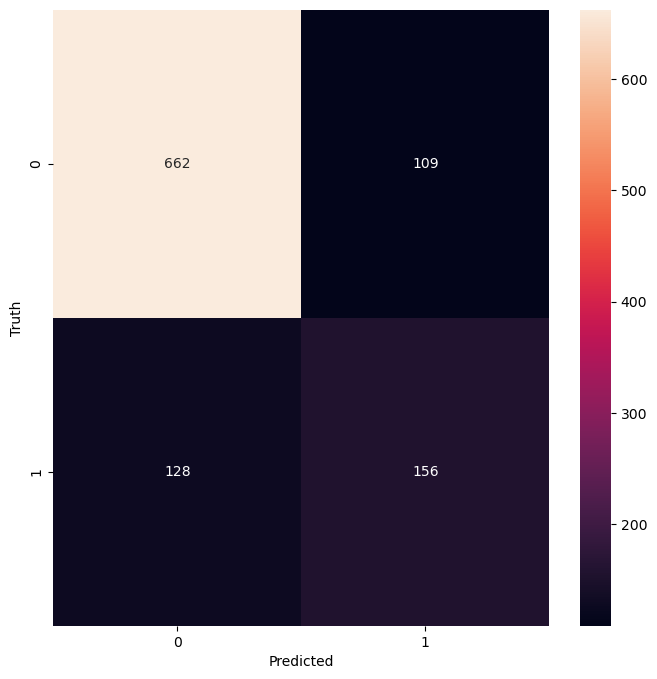

In [45]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predict)

plt.figure(figsize = (8,8))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Accuracy:

Ratio of total correct predictions/Total number of predictions

In [46]:
round((689+131)/(689+131+153+82),2)

0.78

Precison for class 0 who didnot left the service

Total correct predictions for class 0 / Total number of prediction class 0

In [47]:
round(131/(131 + 82), 2)

0.62

Precison for class 1 who left the service

Total correct predictions for class 1 / Total number of prediction class 1

In [48]:
round(689/(689+153),2)

0.82

Recall for class 0:

Number of correctly predicted class 0 / Total number of Actual class 0

In [49]:
round(131/(131+153), 2)

0.46

Recall for class 1:

Number of correctly predicted class 1 / Total number of Actual class 1

In [50]:
round(689/(689+82),2)

0.89

F1 score for any class:

Harmonic mean of precison and recall for any class label

WE ARE TRYING TO IMPROVE THE ACCURACY OF THE MODEL BY REDUCING THE DIFFERENCE IN TRAIN AND TEST ACCURACIES.

In [51]:
y_test.value_counts()

0    771
1    284
Name: Churn, dtype: int64

WE SEE HERE THAT THE DATASET IS IMBALANCED.

CLASS COUNT IN THE ORIGINAL DATASET

In [52]:
count_class_0, count_class_1 = df1.Churn.value_counts()

In [53]:
count_class_0

5163

In [54]:
count_class_1

1869

DIVIDE BY CLASS

In [55]:
df_class_0 = df2[df2['Churn']==0]
df_class_1 = df2[df2['Churn']==1]

In [56]:
df_class_0.shape

(5163, 24)

In [57]:
df_class_1.shape

(1869, 24)

LETS HANDLE THE IMBALANCE IN DATASET

UNDERSAMPLING

Randomly choose data points from the majority sample. Count of data points chosen from majority sample will match the count of data points in minority sample.

In [61]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis = 0)

In [63]:
df_test_under.shape

(3738, 24)

In [64]:
df_test_under['Churn'].value_counts()

0    1869
1    1869
Name: Churn, dtype: int64

In [65]:
X = df_test_under.drop('Churn', axis = 'columns')
y = df_test_under.Churn

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15, stratify=y)

In [67]:
y_test.value_counts()

1    374
0    374
Name: Churn, dtype: int64

In [69]:
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

stratify = y 

This makes sure that the class is evenly distributed in both the training and the test dataset.

In [70]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(23,), activation = 'relu'),
    keras.layers.Dense(10, input_shape=(20,), activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid'),
])

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics=['accuracy'])

model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
 9/94 [=>............................] - ETA: 0s - loss: 0.6950 - accuracy: 0.5139 

2022-12-07 18:50:25.101524: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


94/94 [==============================] - 1s 8ms/step - loss: 0.6331 - accuracy: 0.6659
Epoch 2/100
94/94 [==============================] - 1s 6ms/step - loss: 0.5370 - accuracy: 0.7455
Epoch 3/100
94/94 [==============================] - 1s 6ms/step - loss: 0.5026 - accuracy: 0.7629
Epoch 4/100
94/94 [==============================] - 1s 5ms/step - loss: 0.4941 - accuracy: 0.7612
Epoch 5/100
94/94 [==============================] - 1s 5ms/step - loss: 0.4893 - accuracy: 0.7629
Epoch 6/100
94/94 [==============================] - 1s 5ms/step - loss: 0.4875 - accuracy: 0.7656
Epoch 7/100
94/94 [==============================] - 1s 5ms/step - loss: 0.4854 - accuracy: 0.7689
Epoch 8/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4846 - accuracy: 0.7659
Epoch 9/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4822 - accuracy: 0.7712
Epoch 10/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4809 - accuracy: 0.7679
Epoch 11/100
94/94 [=

In [72]:
model.evaluate(X_test, y_test)

24/24 [==============================] - 0s 4ms/step - loss: 0.5531 - accuracy: 0.7393


[0.5531383752822876, 0.7393048405647278]

In [73]:
y_pred = model.predict(X_test)

24/24 [==============================] - 0s 2ms/step


2022-12-07 18:52:04.857185: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [74]:
y_predict = []
for ele in y_pred:
    if ele > 0.5:
        y_predict.append(1)
    else:
        y_predict.append(0)

In [75]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.75      0.72      0.74       374
           1       0.73      0.75      0.74       374

    accuracy                           0.74       748
   macro avg       0.74      0.74      0.74       748
weighted avg       0.74      0.74      0.74       748



Certainly the model has imporoved.

Text(70.72222222222221, 0.5, 'Truth')

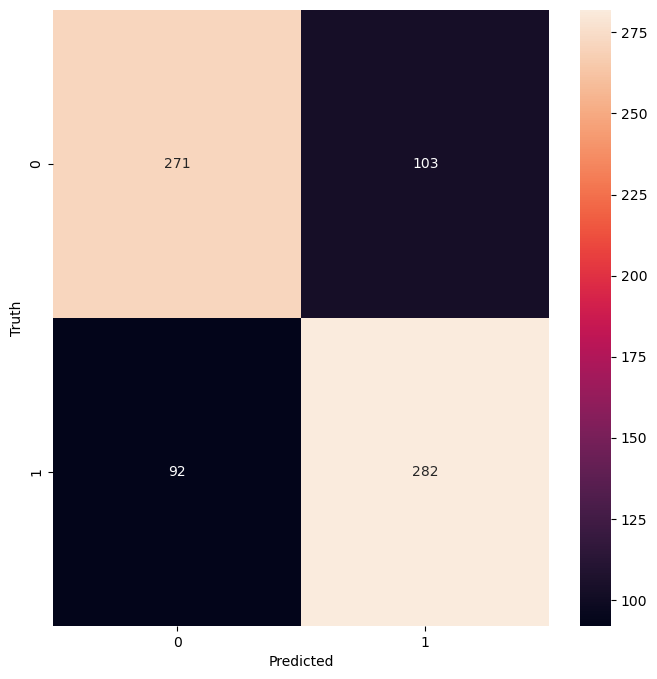

In [76]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predict)

plt.figure(figsize = (8,8))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

OVERSAMPLING

In [77]:
count_class_0, count_class_1

(5163, 1869)

`df.sample` will be used again but we will add `repalce=True`

In [78]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)

df_test_over = pd.concat([df_class_0, df_class_1_over], axis = 0)

In [79]:
df_test_over.Churn.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [80]:
df_test_over.shape

(10326, 24)

In [81]:
X = df_test_over.drop('Churn', axis = 'columns')
y = df_test_over.Churn

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15, stratify=y)

In [83]:
print(y_test.value_counts())
print(y_train.value_counts())

1    1033
0    1033
Name: Churn, dtype: int64
1    4130
0    4130
Name: Churn, dtype: int64


In [84]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(23,), activation = 'relu'),
    keras.layers.Dense(10, input_shape=(20,), activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid'),
])

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics=['accuracy'])

model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
  9/259 [>.............................] - ETA: 1s - loss: 0.6851 - accuracy: 0.5035 

2022-12-07 19:07:27.786423: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


259/259 [==============================] - 2s 7ms/step - loss: 0.5577 - accuracy: 0.7171
Epoch 2/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4963 - accuracy: 0.7671
Epoch 3/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4883 - accuracy: 0.7684
Epoch 4/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4839 - accuracy: 0.7702
Epoch 5/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4801 - accuracy: 0.7724
Epoch 6/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4779 - accuracy: 0.7731
Epoch 7/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4749 - accuracy: 0.7740
Epoch 8/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4735 - accuracy: 0.7742
Epoch 9/100
259/259 [==============================] - 1s 6ms/step - loss: 0.4710 - accuracy: 0.7762
Epoch 10/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4691 - accuracy: 0.7783
E

In [87]:
model.evaluate(X_test, y_test)

65/65 [==============================] - 0s 4ms/step - loss: 0.4763 - accuracy: 0.7662


[0.47629451751708984, 0.766214907169342]

In [86]:
y_pred = model.predict(X_test)

65/65 [==============================] - 0s 2ms/step


2022-12-07 19:10:20.130992: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [88]:
y_predict = []
for ele in y_pred:
    if ele > 0.5:
        y_predict.append(1)
    else:
        y_predict.append(0)

In [89]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76      1033
           1       0.75      0.79      0.77      1033

    accuracy                           0.77      2066
   macro avg       0.77      0.77      0.77      2066
weighted avg       0.77      0.77      0.77      2066



MUCH BETTER

Text(70.72222222222221, 0.5, 'Truth')

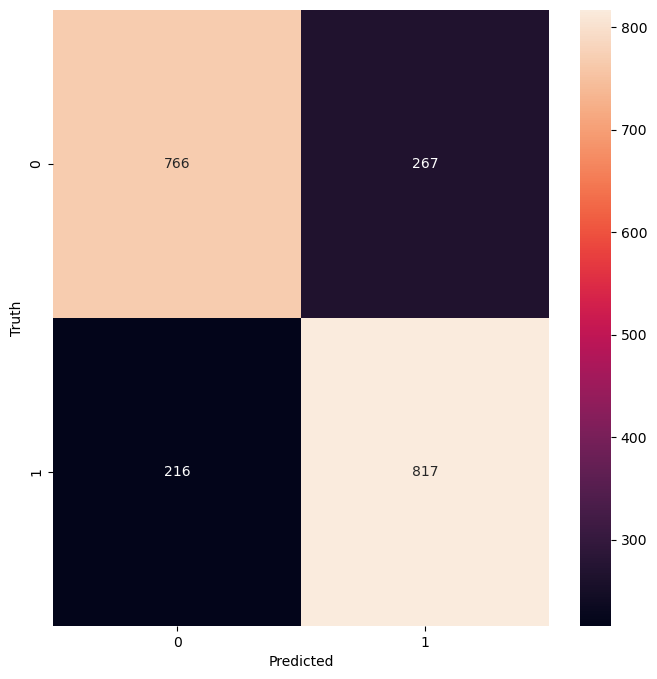

In [90]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predict)

plt.figure(figsize = (8,8))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# SMOTE

Preparing the datasets.

In [91]:
X = df2.drop('Churn', axis='columns')
y = df2.Churn

In [92]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [93]:
pip install imbalanced-learn

  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)
Note: you may need to restart the kernel to use updated packages.


In [94]:
from imblearn.over_sampling import SMOTE

In [98]:
smote = SMOTE(sampling_strategy='minority')

In [100]:
X_sm, y_sm = smote.fit_resample(X,y)

In [101]:
y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [103]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [104]:
y_test.value_counts()

1    1033
0    1033
Name: Churn, dtype: int64

In [105]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(23,), activation = 'relu'),
    keras.layers.Dense(10, input_shape=(20,), activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid'),
])

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics=['accuracy'])

model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
  7/259 [..............................] - ETA: 2s - loss: 0.7356 - accuracy: 0.3973  

2022-12-07 19:51:21.975708: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


259/259 [==============================] - 2s 6ms/step - loss: 0.5986 - accuracy: 0.6706
Epoch 2/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4965 - accuracy: 0.7610
Epoch 3/100
259/259 [==============================] - 2s 6ms/step - loss: 0.4867 - accuracy: 0.7709
Epoch 4/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4838 - accuracy: 0.7694
Epoch 5/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4810 - accuracy: 0.7701
Epoch 6/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4784 - accuracy: 0.7692
Epoch 7/100
259/259 [==============================] - 2s 7ms/step - loss: 0.4761 - accuracy: 0.7720
Epoch 8/100
259/259 [==============================] - 1s 6ms/step - loss: 0.4736 - accuracy: 0.7724
Epoch 9/100
259/259 [==============================] - 1s 6ms/step - loss: 0.4719 - accuracy: 0.7736
Epoch 10/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4696 - accuracy: 0.7759
E

In [106]:
model.evaluate(X_test, y_test)

24/65 [==========>...................] - ETA: 0s - loss: 0.4782 - accuracy: 0.7695

2022-12-07 19:54:06.219438: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


65/65 [==============================] - 0s 5ms/step - loss: 0.4649 - accuracy: 0.7783


[0.4649379849433899, 0.7783156037330627]

In [107]:
y_pred = model.predict(X_test)

65/65 [==============================] - 0s 2ms/step


2022-12-07 19:54:23.711631: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [108]:
y_predict = []
for ele in y_pred:
    if ele > 0.5:
        y_predict.append(1)
    else:
        y_predict.append(0)

In [109]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.83      0.70      0.76      1033
           1       0.74      0.85      0.79      1033

    accuracy                           0.78      2066
   macro avg       0.78      0.78      0.78      2066
weighted avg       0.78      0.78      0.78      2066



Text(70.72222222222221, 0.5, 'Truth')

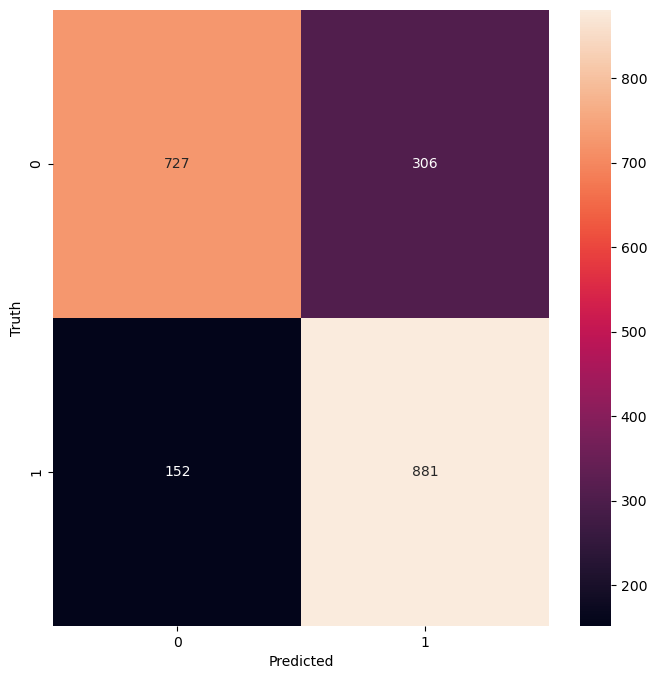

In [110]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predict)

plt.figure(figsize = (8,8))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# ENSEMBLE WITH UNDERSAMPLING

In [111]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [112]:
X = df2.drop('Churn', axis='columns')
y = df2.Churn

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [114]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [115]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [116]:
df3_class0 = df3[df3.Churn == 0]
df3_class1 = df3[df3.Churn == 1]

In [117]:
df3_class0.shape, df3_class1.shape

((4130, 24), (1495, 24))

In [118]:
df_train = pd.concat([df3_class0[:1495], df3_class1], axis=0)

In [119]:
df_train.shape

(2990, 24)

Defining a custom function to split the dataset.

In [120]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)
    
    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    
    return X_train, y_train

In [121]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

In [122]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(23,), activation = 'relu'),
    keras.layers.Dense(10, input_shape=(20,), activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid'),
])

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics=['accuracy'])

model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
 7/94 [=>............................] - ETA: 0s - loss: 0.6767 - accuracy: 0.5536 

2022-12-07 21:00:16.692359: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


94/94 [==============================] - 1s 7ms/step - loss: 0.6108 - accuracy: 0.6946
Epoch 2/100
94/94 [==============================] - 1s 7ms/step - loss: 0.5260 - accuracy: 0.7512
Epoch 3/100
94/94 [==============================] - 1s 6ms/step - loss: 0.5001 - accuracy: 0.7555
Epoch 4/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4923 - accuracy: 0.7642
Epoch 5/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4867 - accuracy: 0.7666
Epoch 6/100
94/94 [==============================] - 1s 5ms/step - loss: 0.4854 - accuracy: 0.7666
Epoch 7/100
94/94 [==============================] - 1s 5ms/step - loss: 0.4808 - accuracy: 0.7649
Epoch 8/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4796 - accuracy: 0.7689
Epoch 9/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4772 - accuracy: 0.7672
Epoch 10/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4756 - accuracy: 0.7669
Epoch 11/100
94/94 [=

94/94 [==============================] - 1s 6ms/step - loss: 0.4232 - accuracy: 0.7936
Epoch 84/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4245 - accuracy: 0.7950
Epoch 85/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4224 - accuracy: 0.7983
Epoch 86/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4218 - accuracy: 0.7980
Epoch 87/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4231 - accuracy: 0.7970
Epoch 88/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4210 - accuracy: 0.7980
Epoch 89/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4217 - accuracy: 0.7910
Epoch 90/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4206 - accuracy: 0.8007
Epoch 91/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4207 - accuracy: 0.7987
Epoch 92/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4205 - accuracy: 0.8013
Epoch 93/100


In [123]:
model.evaluate(X_test, y_test)

26/44 [================>.............] - ETA: 0s - loss: 0.5353 - accuracy: 0.7560

2022-12-07 21:01:31.854391: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


44/44 [==============================] - 0s 5ms/step - loss: 0.5368 - accuracy: 0.7427


[0.5368395447731018, 0.7427150011062622]

In [124]:
y_pred = model.predict(X_test)

44/44 [==============================] - 0s 2ms/step


2022-12-07 21:01:53.902212: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [125]:
y_predict = []
for ele in y_pred:
    if ele > 0.5:
        y_predict.append(1)
    else:
        y_predict.append(0)

In [126]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1033
           1       0.51      0.76      0.61       374

    accuracy                           0.74      1407
   macro avg       0.70      0.75      0.71      1407
weighted avg       0.79      0.74      0.76      1407



Text(70.72222222222221, 0.5, 'Truth')

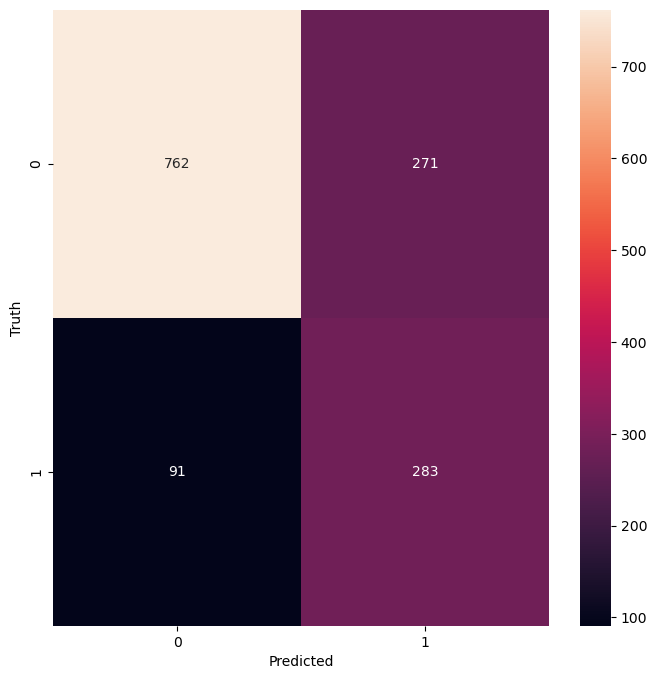

In [127]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predict)

plt.figure(figsize = (8,8))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [128]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

In [129]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(23,), activation = 'relu'),
    keras.layers.Dense(10, input_shape=(20,), activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid'),
])

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics=['accuracy'])

model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
 6/94 [>.............................] - ETA: 0s - loss: 0.6947 - accuracy: 0.4844 

2022-12-07 21:03:18.242128: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


94/94 [==============================] - 1s 7ms/step - loss: 0.6464 - accuracy: 0.6355
Epoch 2/100
94/94 [==============================] - 1s 6ms/step - loss: 0.5381 - accuracy: 0.7435
Epoch 3/100
94/94 [==============================] - 1s 7ms/step - loss: 0.4991 - accuracy: 0.7512
Epoch 4/100
94/94 [==============================] - 1s 7ms/step - loss: 0.4911 - accuracy: 0.7585
Epoch 5/100
94/94 [==============================] - 1s 7ms/step - loss: 0.4865 - accuracy: 0.7622
Epoch 6/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4836 - accuracy: 0.7672
Epoch 7/100
94/94 [==============================] - 1s 7ms/step - loss: 0.4800 - accuracy: 0.7689
Epoch 8/100
94/94 [==============================] - 1s 7ms/step - loss: 0.4773 - accuracy: 0.7729
Epoch 9/100
94/94 [==============================] - 1s 7ms/step - loss: 0.4764 - accuracy: 0.7716
Epoch 10/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4746 - accuracy: 0.7763
Epoch 11/100
94/94 [=

94/94 [==============================] - 1s 6ms/step - loss: 0.4085 - accuracy: 0.8097
Epoch 84/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4079 - accuracy: 0.8110
Epoch 85/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4100 - accuracy: 0.8084
Epoch 86/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4068 - accuracy: 0.8094
Epoch 87/100
94/94 [==============================] - 1s 5ms/step - loss: 0.4072 - accuracy: 0.8110
Epoch 88/100
94/94 [==============================] - 1s 5ms/step - loss: 0.4075 - accuracy: 0.8144
Epoch 89/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4059 - accuracy: 0.8117
Epoch 90/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4056 - accuracy: 0.8130
Epoch 91/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4045 - accuracy: 0.8140
Epoch 92/100
94/94 [==============================] - 1s 5ms/step - loss: 0.4043 - accuracy: 0.8120
Epoch 93/100


In [130]:
model.evaluate(X_test, y_test)

19/44 [===========>..................] - ETA: 0s - loss: 0.5240 - accuracy: 0.7352

2022-12-07 21:04:19.797112: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


44/44 [==============================] - 0s 6ms/step - loss: 0.5578 - accuracy: 0.7157


[0.5577534437179565, 0.7157071828842163]

In [131]:
y_pred = model.predict(X_test)

44/44 [==============================] - 0s 2ms/step


2022-12-07 21:04:25.141127: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [132]:
y_predict = []
for ele in y_pred:
    if ele > 0.5:
        y_predict.append(1)
    else:
        y_predict.append(0)

In [133]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.88      0.71      0.79      1033
           1       0.48      0.73      0.58       374

    accuracy                           0.72      1407
   macro avg       0.68      0.72      0.68      1407
weighted avg       0.77      0.72      0.73      1407



Text(70.72222222222221, 0.5, 'Truth')

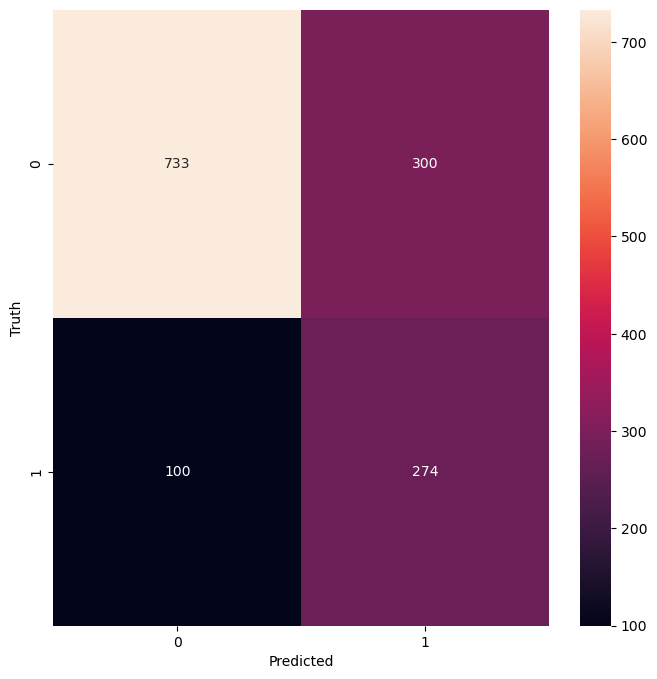

In [134]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predict)

plt.figure(figsize = (8,8))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [135]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

In [136]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(23,), activation = 'relu'),
    keras.layers.Dense(10, input_shape=(20,), activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid'),
])

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics=['accuracy'])

model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
 1/83 [..............................] - ETA: 22s - loss: 0.7867 - accuracy: 0.5000

2022-12-07 21:06:26.332523: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


83/83 [==============================] - 1s 9ms/step - loss: 0.6608 - accuracy: 0.6342
Epoch 2/100
83/83 [==============================] - 0s 6ms/step - loss: 0.5518 - accuracy: 0.7507
Epoch 3/100
83/83 [==============================] - 1s 7ms/step - loss: 0.5057 - accuracy: 0.7624
Epoch 4/100
83/83 [==============================] - 1s 7ms/step - loss: 0.4901 - accuracy: 0.7685
Epoch 5/100
83/83 [==============================] - 1s 7ms/step - loss: 0.4826 - accuracy: 0.7696
Epoch 6/100
83/83 [==============================] - 1s 7ms/step - loss: 0.4789 - accuracy: 0.7689
Epoch 7/100
83/83 [==============================] - 1s 7ms/step - loss: 0.4762 - accuracy: 0.7727
Epoch 8/100
83/83 [==============================] - 1s 7ms/step - loss: 0.4735 - accuracy: 0.7803
Epoch 9/100
83/83 [==============================] - 1s 6ms/step - loss: 0.4717 - accuracy: 0.7776
Epoch 10/100
83/83 [==============================] - 0s 6ms/step - loss: 0.4688 - accuracy: 0.7822
Epoch 11/100
83/83 [=

83/83 [==============================] - 0s 6ms/step - loss: 0.4085 - accuracy: 0.8156
Epoch 84/100
83/83 [==============================] - 1s 6ms/step - loss: 0.4074 - accuracy: 0.8171
Epoch 85/100
83/83 [==============================] - 0s 6ms/step - loss: 0.4069 - accuracy: 0.8156
Epoch 86/100
83/83 [==============================] - 0s 5ms/step - loss: 0.4082 - accuracy: 0.8156
Epoch 87/100
83/83 [==============================] - 0s 6ms/step - loss: 0.4065 - accuracy: 0.8152
Epoch 88/100
83/83 [==============================] - 1s 7ms/step - loss: 0.4048 - accuracy: 0.8167
Epoch 89/100
83/83 [==============================] - 1s 7ms/step - loss: 0.4045 - accuracy: 0.8213
Epoch 90/100
83/83 [==============================] - 0s 6ms/step - loss: 0.4050 - accuracy: 0.8163
Epoch 91/100
83/83 [==============================] - 0s 6ms/step - loss: 0.4050 - accuracy: 0.8159
Epoch 92/100
83/83 [==============================] - 0s 6ms/step - loss: 0.4031 - accuracy: 0.8152
Epoch 93/100


In [137]:
model.evaluate(X_test, y_test)

24/44 [===============>..............] - ETA: 0s - loss: 0.6232 - accuracy: 0.6914

2022-12-07 21:07:48.984219: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


44/44 [==============================] - 0s 5ms/step - loss: 0.6392 - accuracy: 0.6716


[0.6392270922660828, 0.6716418266296387]

In [138]:
y_pred = model.predict(X_test)

44/44 [==============================] - 0s 2ms/step


2022-12-07 21:07:54.235106: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [139]:
y_predict = []
for ele in y_pred:
    if ele > 0.5:
        y_predict.append(1)
    else:
        y_predict.append(0)

In [140]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.90      0.62      0.73      1033
           1       0.44      0.82      0.57       374

    accuracy                           0.67      1407
   macro avg       0.67      0.72      0.65      1407
weighted avg       0.78      0.67      0.69      1407



Text(70.72222222222221, 0.5, 'Truth')

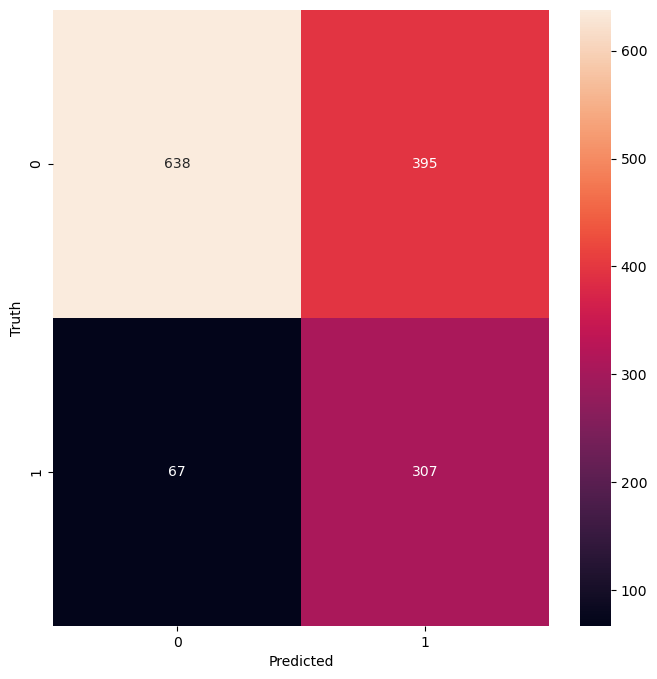

In [141]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predict)

plt.figure(figsize = (8,8))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

WE AGGREGATE ALL THE SAMPLE RESULTS OF ENSEMBLE BASED ON VOTING AND GET THE FINAL RESULT.

## CONCLUSION : OUT OF ALL SMOTE HAS PERFORMED THE BEST IN THIS CASE.